# Recommended Analysis

**1. Ranking overall, by Industry and by single title (top 5), using mean Volume (and Trades)**

*Group by Industry - Calculate the Mean of Volume and Trades - Top 5 Values 

*Group by Ticker - Calculate the Mean of Volume and Trades - Top 5 Values

**2. Ranking of Must trading stock Since Inception (using Trades)**

*Group by Ticker - Calculate the Mean and Sum of Trades - Top 5 Values 

**3. Top 5 best stocks using delta price % Since**

*GroupBy on the basis of the company name

*Calculate the percentage change using the equation [X(final) - X(initial)] / X(initial) * 100.

*Final - the last occurrence of close

*Initial - the first occurrence of close

**4. Top 5 worst stocks using delta price % Since Inception**

**5. Standard deviation is a statistical term that measures the amount of variability or dispersion around an average. Standard deviation is also a measure of volatility: using Numpy is easy to calculate it for each stock or sector into Index.**

*With SD, we could calculate the coefficient of variation (CV=standard deviation/mean). As a rule of thumb, a CV >= 1 indicates a relatively high variation, while a CV < 1 can be considered low. This means that distributions with a coefficient of variation higher than 1 are considered to be high variance whereas those with a CV lower than 1 are considered to be low variance.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing essential and useful libabries
#As we can see that there are lots of datasets in a single file
#Hence, we will assume that 'df' is a combined list/group of all datasets

df = [pd.read_csv('/kaggle/input/nifty50-stock-market-data/ADANIPORTS.csv'), pd.read_csv('/kaggle/input/nifty50-stock-market-data/ASIANPAINT.csv'), pd.read_csv('/kaggle/input/nifty50-stock-market-data/AXISBANK.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJAJ-AUTO.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJAJFINSV.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJFINANCE.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/BHARTIARTL.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/BPCL.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/CIPLA.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/COALINDIA.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/DRREDDY.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/EICHERMOT.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/GAIL.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/GRASIM.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/HCLTECH.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFC.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/HINDALCO.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/ICICIBANK.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/INDUSINDBK.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/INFRATEL.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/INFY.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/IOC.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/ITC.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/KOTAKBANK.csv'),pd.read_csv('/kaggle/input/nifty50-stock-market-data/LT.csv')]
df

[            Date      Symbol Series  Prev Close    Open     High     Low  \
 0     2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.00   
 1     2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
 2     2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
 3     2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
 4     2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
 ...          ...         ...    ...         ...     ...      ...     ...   
 3317  2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
 3318  2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
 3319  2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
 3320  2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
 3321  2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   
 
        Last   Close    VWAP    Volume      Turnover    Trades  \
 0     9

In [3]:
#It will be so difficult to perform any operation on such types of multiple files
#Hence, we need to combine/concatnate all files in a single df

combined_dataset = pd.concat(df, ignore_index = True)
combined_dataset

/tmp/ipykernel_18/3779388382.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataset = pd.concat(df, ignore_index = True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140956,2021-04-26,LT,EQ,1322.90,1330.05,1341.20,1323.0,1339.00,1335.90,1334.93,1431562,1.911037e+14,52965.0,518221.0,0.3620
140957,2021-04-27,LT,EQ,1335.90,1339.00,1388.45,1335.9,1384.00,1380.65,1370.45,4303909,5.898288e+14,128988.0,1899385.0,0.4413
140958,2021-04-28,LT,EQ,1380.65,1384.85,1399.95,1372.5,1374.15,1375.90,1383.54,3220346,4.455488e+14,88395.0,1638109.0,0.5087
140959,2021-04-29,LT,EQ,1375.90,1383.95,1389.55,1353.5,1358.80,1358.65,1366.40,2221346,3.035242e+14,71953.0,1070434.0,0.4819


In [4]:
#Saving combined dataset to a new csv file

combined_dataset.to_csv('combined_datnaset.csv', index = False)

# 1. Ranking overall, by Industry, and by single title (top 5), using mean Volume (and Trades).

<Axes: title={'center': 'Top 5 Series by Mean Volume and Trades'}, xlabel='Series'>

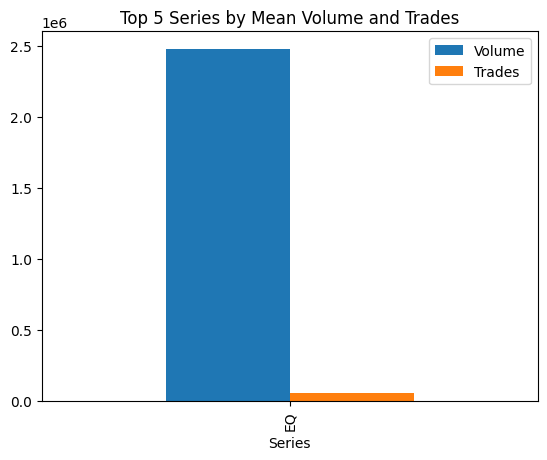

In [5]:
#Ranking overall, by industry, and by single title (top 5), using mean Volume (and Trades)

industry_ranking = combined_dataset.groupby('Series').agg({'Volume': 'mean', 'Trades': 'mean'}).sort_values(by='Volume', ascending=False).head(5)
industry_ranking.plot(kind='bar', y=['Volume', 'Trades'], title='Top 5 Series by Mean Volume and Trades') 

# 2. Ranking of Must trading stock Since Inception (using Trades)

<Axes: title={'center': 'Top 5 Tickers by Sum of Trades Since Inception'}, xlabel='Symbol'>

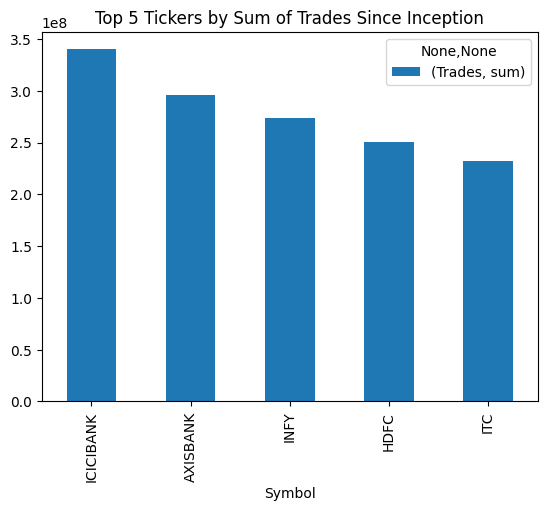

In [6]:
since_inception_ranking = combined_dataset.groupby('Symbol').agg({'Trades': ['mean', 'sum']}).sort_values(by=('Trades', 'sum'), ascending=False).head(5)
since_inception_ranking.plot(kind='bar', y=('Trades', 'sum'), 
                             title='Top 5 Tickers by Sum of Trades Since Inception')

# 3. Top 5 best stocks using delta price % Since Inception

<Axes: title={'center': 'Top 5 Stocks by Delta Price % Since Inception'}, xlabel='Symbol'>

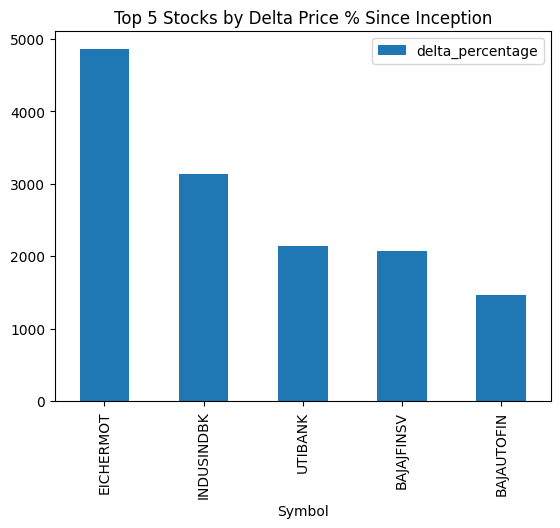

In [7]:
combined_dataset['Date'] = pd.to_datetime(combined_dataset['Date'])
price_change = combined_dataset.groupby('Symbol')['Close'].agg(['first', 'last'])
price_change['delta_percentage'] = ((price_change['last'] - price_change['first']) / price_change['first']) * 100
best_stocks = price_change.sort_values(by='delta_percentage', ascending=False).head(5)
best_stocks.plot(kind='bar', y='delta_percentage', title='Top 5 Stocks by Delta Price % Since Inception')

# 4. Top 5 worst stocks using delta price % Since Inception

<Axes: title={'center': 'Top 5 Stocks by Delta Price % Since Inception'}, xlabel='Symbol'>

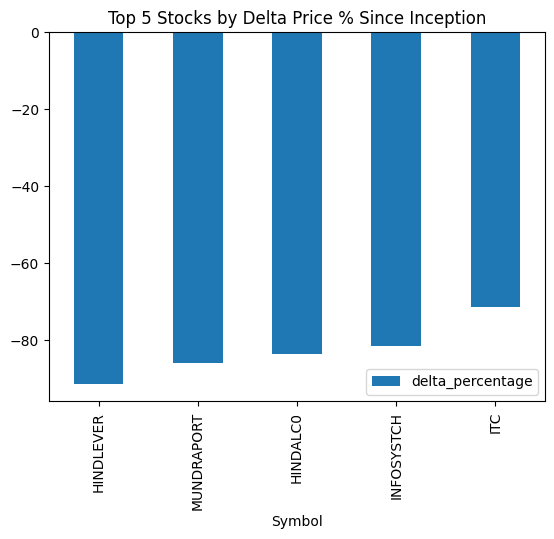

In [8]:
worst_stocks = price_change.sort_values(by='delta_percentage').head(5)
worst_stocks.plot(kind='bar', y='delta_percentage', title='Top 5 Stocks by Delta Price % Since Inception')

# 5. Standard deviation and Coefficient of Variation

<Axes: title={'center': 'Coefficient of Variation for Each Stock'}, xlabel='Symbol'>

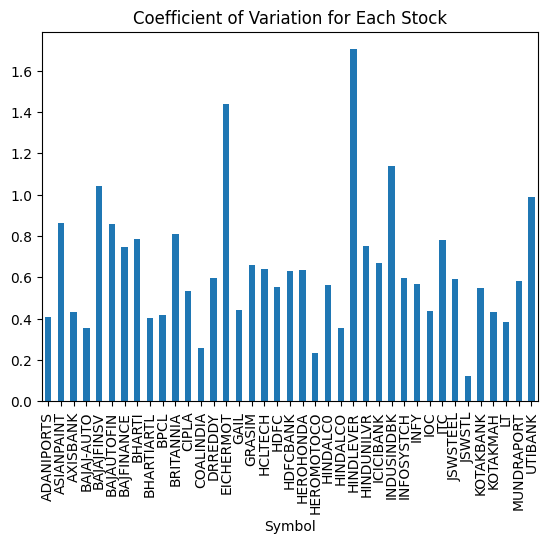

In [9]:
std_deviation = combined_dataset.groupby('Symbol')['Close'].std()
mean_prices = combined_dataset.groupby('Symbol')['Close'].mean()
coefficient_of_variation = std_deviation / mean_prices
coefficient_of_variation.plot(kind='bar', title='Coefficient of Variation for Each Stock')